In [1]:
from datetime import datetime, timedelta
import json
from math import ceil
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append('..')
from models.qp.qpercent import QPercent
from util.batcher import Batcher
from util.stock_loader import Loader

In [2]:
!ls ../models/qp

__pycache__ data        qpercent.py


In [3]:
SD = 0.05 * (0.8 ** 3) # -4 ... 10 
print('SD:', SD)

SD: 0.025600000000000008


In [4]:
DATA = '../models/qp/data'
SYMBOLS = [
    'ABMD', 'ABNB', 'ANET', 'ATVI', 'AXON', 'AYX', 'BILI', 'BYND', 'COUR',
    'CPNG', 'DDOG', 'DOCU', 'EDIT', 'ETSY', 'FSLY', 'FUV', 'GH', 'GMED', 
    'INTG', 'ISRG', 'JD', 'LULU', 'LUV', 'MDB', 'MELI', 'MNST', 'MTCH', 
    'NVCR', 'OKTA', 'PANW', 'PINS', 'PTON', 'QDEL', 'RDFN', 'RGEN', 
    'ROKU', 'SE', 'SHOP', 'TDOC', 'TEAM', 'TREX', 'TTD', 'TTWO', 'TWLO', 
    'TWTR', 'VEEV', 'ZEN', 'ZG', 'ZNGA']
INDICES = ['^GSPC', # S&P 500
           '^IXIC', # Nasdaq
           '^NYA']  # NY Stock Exchange (total)
len(SYMBOLS)

49

In [5]:
N_YEARS = 50
N_CUTS = 10
N_DAYS = int(round(365.25 * N_YEARS))
TODAY = datetime.now().date()
START = '1978-07-26' #str(TODAY - timedelta(N_DAYS))
START, TODAY

('1978-07-26', datetime.date(2021, 7, 17))

In [6]:
batcher = Batcher(SYMBOLS, INDICES)
batch = batcher.get_batch_from_weekday(TODAY.weekday())
batch

['ROKU', 'SE', 'SHOP', 'TDOC', 'TEAM', 'TREX', 'TTD', '^NYA']

In [7]:
stock_loader = Loader(batch, START, verbose=True)
data = stock_loader.download()

[*********************100%***********************]  8 of 8 completed
Generating derived columns...
   ...ROKU
   ...SE
   ...SHOP
   ...TDOC
   ...TEAM
   ...TREX
   ...TTD
   ...^NYA


In [8]:
def get_stock_data(stock, data):
    sub = data.loc[
        :,  
        [x for x in list(data) if x[1] == stock or x[0] == 'Date']]
    first_value = sub.Value[stock][sub.Value[stock].notna()].index[0]
    sub = sub.loc[first_value:, :]
    sub.index = range(sub.shape[0])
    sub.columns = sub.columns.to_series().apply(lambda x: x[0])
    return sub

In [9]:
def str_to_tuple(s):
    s = s[1:-1]
    return tuple([float(x) for x in s.split(', ')])

str_to_tuple('(0.123, 0.456)')

(0.123, 0.456)

In [10]:
def read_best_params(stock):
    try:
        with open(f'{DATA}/{stock}_best.json', 'r') as f:
            params = json.load(f)
        for k in params:
            params[k]['q_params'] = {
                str_to_tuple(k): v 
                for k, v in params[k]['q_params'].items()}
        best_returns = {k: params[k]['best_return'] for k in params}
        print('Loaded current best.')
        return params, best_returns
    except FileNotFoundError:
        print('No saved data. Initialized as None')
        return None, None
    except:
        print(f'Unexpected error getting {stock} data. '
              'Initialized as None.')

In [11]:
def get_best_param_set(qp):
    best_param_set = qp.best_param_set
    for method in best_param_set:
        best_param_set[method]['best_return'] = qp.best_returns[method]
        # stringify tuple keys:
        best_param_set[method]['q_params'] = {
            str(k): v 
            for k, v in best_param_set[method]['q_params'].items()}
    return best_param_set

In [12]:
def save_best_param_set(best_param_set, stock):
    print(f'Saving {stock} params...')
    with open(f'{DATA}/{stock}_best.json', 'w') as f:
        json.dump(best_param_set, f)

In [13]:
if TODAY.weekday() == 0:
    !say update standard deviation




----------------------------------------------------------------------
                                 ROKU
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 8.783267066162798
Refitting current best...
Current best ma returns: 12.220121424015225
Fraction Invested: 0.9991067582660014
Beginning random search...
Round: 5
Beginning adjusted search...
New best: 12.22040683307143
Invested: 0.9991067582660014
New best: 12.22222971894165
Invested: 0.9991067582660014
New best: 12.222365448057825
Invested: 0.9991067582660014
New best: 12.22261583673699
Invested: 0.9991067582660014
New best: 12.222686339353293
Invested: 0.9991067582660014
New best: 12.223858821862338
Invested: 0.9991067582660014
New best: 12.223869099750782
Invested: 0.9991067582660014
New best: 12.224053190790293
Invested: 0.9991067582660014
New best: 12.224061478242694
Invested: 0.9991067

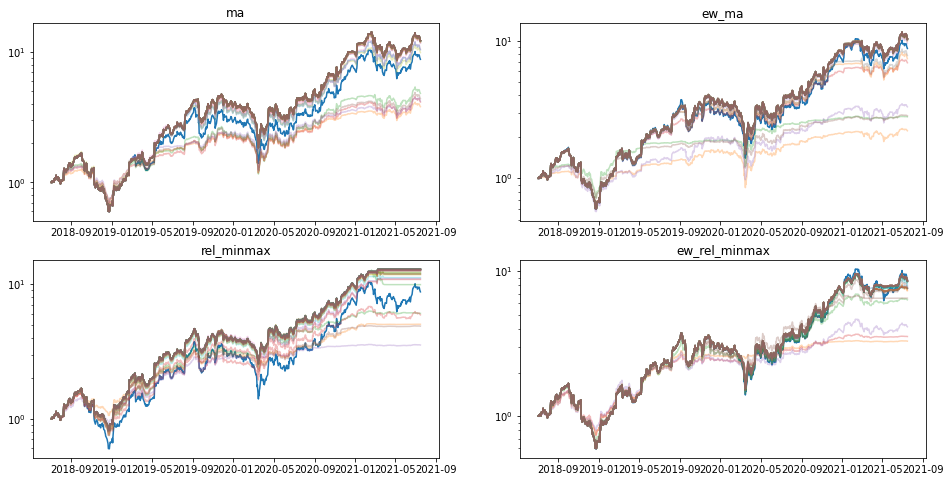

Saving ROKU params...



----------------------------------------------------------------------
                                 SE
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 17.54754138383709
Refitting current best...
Current best ma returns: 18.63714325934974
Fraction Invested: 0.999650247037992
Beginning random search...
Round: 5
Beginning adjusted search...
New best: 18.641458224128577
Invested: 0.999650247037992
New best: 18.641826156352685
Invested: 0.999650247037992
New best: 18.641889939579503
Invested: 0.999650247037992
New best: 18.643491711154375
Invested: 0.999650247037992
New best: 18.649602726171317
Invested: 0.999650247037992
New best: 18.649691035500116
Invested: 0.999650247037992
New best: 18.64985942389673
Invested: 0.999650247037992
Round: 50


Beginning ew_ma method...
--------------------------------------------------
Do n

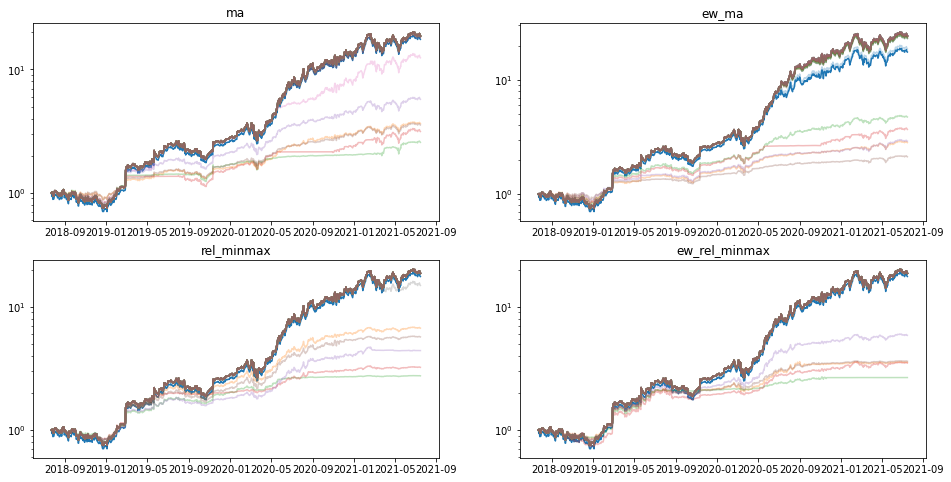

Saving SE params...



----------------------------------------------------------------------
                                 SHOP
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 36.14708119264393
Refitting current best...
Current best ma returns: 40.8088742865433
Fraction Invested: 0.9946310369796133
Beginning random search...
Round: 5
Beginning adjusted search...
New best: 40.80942497973338
Invested: 0.9946310369796133
New best: 40.81351431551459
Invested: 0.9946310369796133
New best: 40.81513218116026
Invested: 0.9946310369796133
New best: 40.81552294128229
Invested: 0.9946310369796133
New best: 40.81637921141122
Invested: 0.9946310369796133
New best: 40.96578444960376
Invested: 0.9946310369796133
New best: 41.55091812186976
Invested: 0.9946310369796133
New best: 41.55382294081226
Invested: 0.9946310369796133
Round: 50


Beginning ew_ma method.

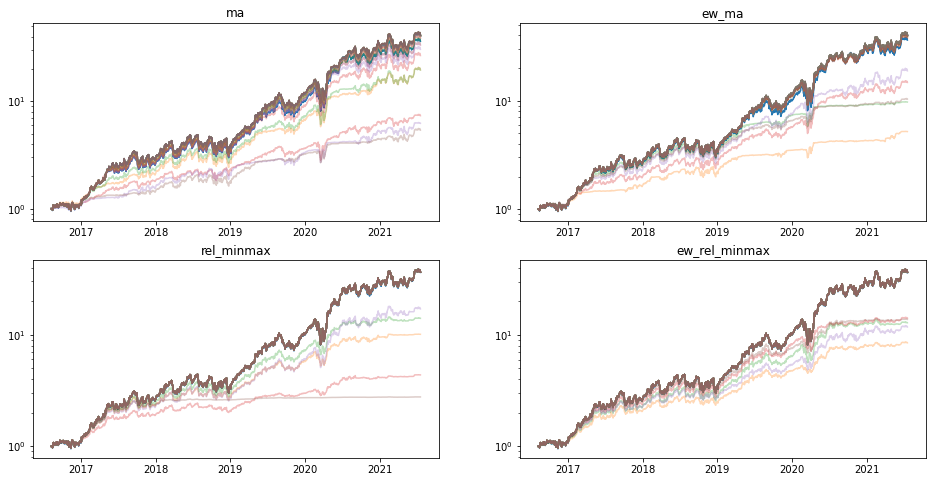

Saving SHOP params...



----------------------------------------------------------------------
                                 TDOC
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 8.168058118411647
Refitting current best...
Current best ma returns: 11.10469933210742
Fraction Invested: 0.9999624755737504
Beginning random search...
Round: 5
Beginning adjusted search...
New best: 11.106033856839344
Invested: 0.9999624755737504
New best: 11.106288062078438
Invested: 0.9999624755737504
New best: 11.106681514627558
Invested: 0.9999624755737504
New best: 11.10672938967285
Invested: 0.9999624755737504
New best: 11.10724586503552
Invested: 0.9999624755737504
New best: 11.107652492415523
Invested: 0.9999624755737504
New best: 11.108099856876175
Invested: 0.9999624755737504
New best: 11.108115683790418
Invested: 0.9999624755737504
New best: 11.1125787168585

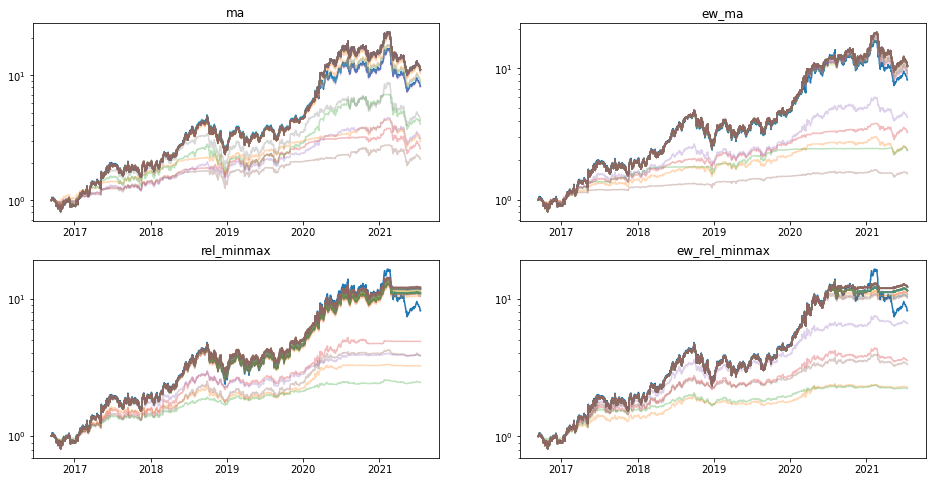

Saving TDOC params...



----------------------------------------------------------------------
                                 TEAM
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 9.33190160403033
Refitting current best...
Current best ma returns: 15.944620319487296
Fraction Invested: 0.9945428017178221
Beginning random search...
Round: 5
Beginning adjusted search...
New best: 15.946544312540196
Invested: 0.9945428017178221
New best: 15.947804297073946
Invested: 0.9945428017178221
New best: 16.036029540512388
Invested: 0.9945428017178221
New best: 16.051870849856293
Invested: 0.9945428017178221
New best: 16.05342762347812
Invested: 0.9945428017178221
New best: 16.107850636056696
Invested: 0.9945428017178221
New best: 16.193488496325948
Invested: 0.9945428017178221
New best: 16.210389314108774
Invested: 0.9945428017178221
New best: 16.228372553237

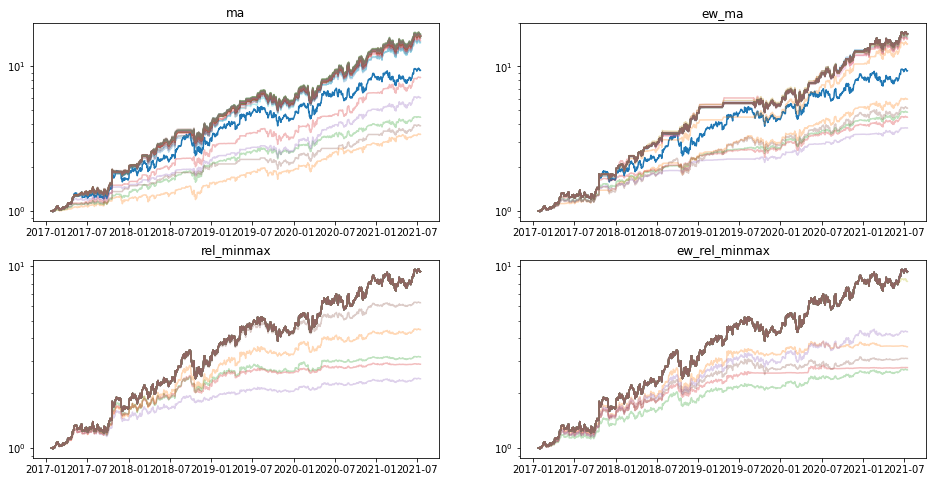

Saving TEAM params...



----------------------------------------------------------------------
                                 TREX
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 21.843003507763875
Refitting current best...
Current best ma returns: 58.5580542889917
Fraction Invested: 0.7603490562031451
Beginning random search...
Round: 5
Beginning adjusted search...
New best: 59.52013288536148
Invested: 0.7603490562031451
New best: 59.673575850637285
Invested: 0.7603490562031451
New best: 60.32760838153099
Invested: 0.7603490562031451
New best: 60.40566945597025
Invested: 0.7603490562031451
New best: 60.43200737621672
Invested: 0.7603490562031451
New best: 60.768911041360234
Invested: 0.7603490562031451
New best: 60.90344634754842
Invested: 0.7603490562031451
New best: 61.0960308870308
Invested: 0.7603490562031451
New best: 61.60429053512375
Inv

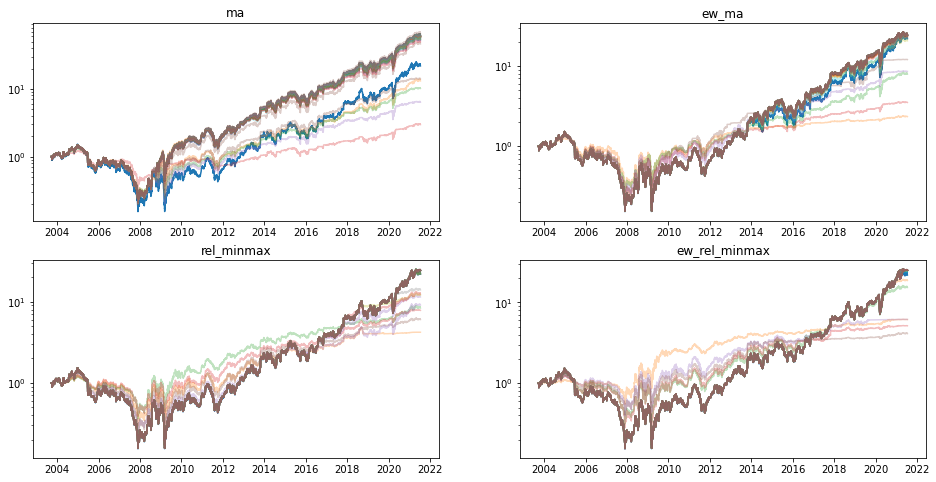

Saving TREX params...



----------------------------------------------------------------------
                                 TTD
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 12.372109404551706
Refitting current best...
Current best ma returns: 7.372885932289928
Fraction Invested: 0.8468416442265765
Beginning random search...
New best: 7.553011476963263
Invested: 0.8636841473137434
Round: 5
Beginning adjusted search...
New best: 7.55441084146043
Invested: 0.8636841473137434
New best: 7.56258671830879
Invested: 0.8636841473137434
New best: 7.564332230603579
Invested: 0.8636841473137434
New best: 7.7115648732634785
Invested: 0.8636841473137434
New best: 7.71552741291439
Invested: 0.855529011548247
New best: 7.75946790198933
Invested: 0.855529011548247
New best: 7.759486544553461
Invested: 0.855529011548247
New best: 7.765992235214851
Invested: 

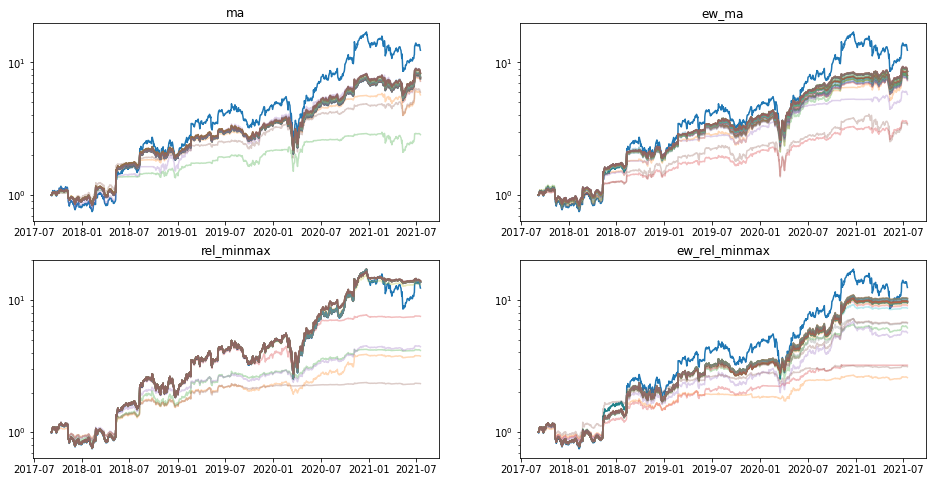

Saving TTD params...



----------------------------------------------------------------------
                                 ^NYA
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 9.505439847288201
Refitting current best...
Current best ma returns: 12.445001679906348
Fraction Invested: 0.9999990157883603
Beginning random search...
Round: 5
Beginning adjusted search...
New best: 12.445464346950157
Invested: 0.9999990157883603
New best: 12.445464717449552
Invested: 0.9999990157883603
Round: 50


Beginning ew_ma method...
--------------------------------------------------
Do nothing returns: 9.505439847288201
Refitting current best...
Current best ew_ma returns: 9.832562231889467
Fraction Invested: 0.9977800215719157
Beginning random search...
Round: 5
Beginning adjusted search...
New best: 9.832618280185429
Invested: 0.9977800215719157
New best: 9.8

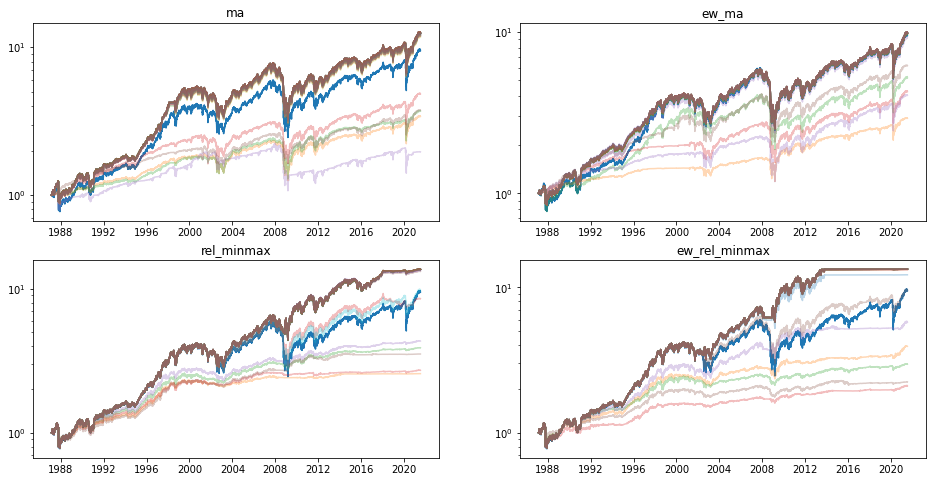

Saving ^NYA params...


In [14]:
N_RAND = 5
N_ADJ = 50

for stock in batch:
    print('\n\n')
    print('-' * 70)
    print(' ' * 32, stock)
    print('-' * 70)
    best_params, best_returns = read_best_params(stock)
    stock_data = get_stock_data(stock, data)
    if stock == 'INTG':
        stock_data.fillna(method='ffill', inplace=True)
        stock_data.fillna(method='bfill', inplace=True)
    qp = QPercent(stock_data, 
                  N_CUTS, 
                  best_param_set=best_params, 
                  best_returns=best_returns, 
                  sd=SD)
    qp.run_sims(N_RAND, N_ADJ)
    best = get_best_param_set(qp)
    save_best_param_set(best, stock)

In [15]:
def get_summary(stocks):
    for stock in stocks:
        try:
            with open(f'{DATA}/{stock}_best.json', 'r') as f:
                best = json.load(f)
            best_method = None
            best_return = 0
            best_pct = None
            for key in best:
                ret = best[key]['best_return']
                if ret > best_return:
                    best_return = ret
                    best_method = key
                    best_pct = best[key]['pct']
            print(f'\n{stock}:\n  Best Return: {best_return} '
                  f'({best_method})\n  {100 * best_pct:.2f}% in')
        except FileNotFoundError:
            print('No data for', stock)
            continue
        except:
            print('Bad Data for', stock)
            continue

In [16]:
ALL = SYMBOLS + INDICES
#get_summary(ALL)
get_summary(batch)


ROKU:
  Best Return: 12.964155068822741 (rel_minmax)
  0.03% in

SE:
  Best Return: 24.377280449325756 (ew_ma)
  100.00% in

SHOP:
  Best Return: 41.55382294081226 (ma)
  99.46% in

TDOC:
  Best Return: 12.22230957653353 (ew_rel_minmax)
  27.01% in

TEAM:
  Best Return: 16.807075366862883 (ew_ma)
  99.88% in

TREX:
  Best Return: 65.74639252266005 (ma)
  77.98% in

TTD:
  Best Return: 14.039948947359253 (rel_minmax)
  14.28% in

^NYA:
  Best Return: 13.688245078315418 (rel_minmax)
  10.24% in


In [17]:
!say qp is dunzo

IXIC: Nasdaq